## QQ_PLOTS

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

%matplotlib inline

In [129]:
a = np.arange(0,10)
b = np.linspace(0,10,3,endpoint=False)[1:]
c = np.round(b)
print(a)
print(b)
print(c)

[0 1 2 3 4 5 6 7 8 9]
[ 3.33333333  6.66666667]
[ 3.  7.]


In [158]:
np.random.uniform(-2,2,3)

array([ 1.69349411, -1.29654155, -1.40886774])

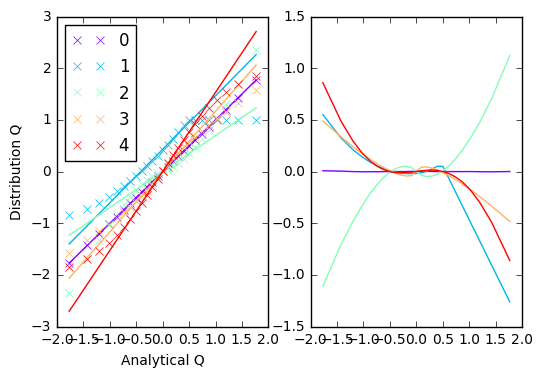

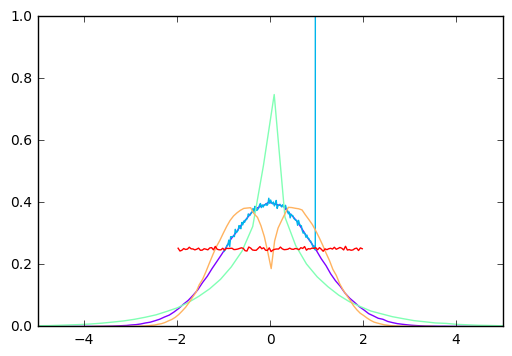

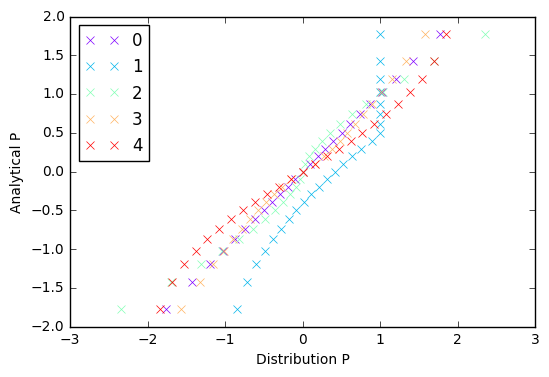

In [168]:
N  =int(5e5)
size = 25
fracs = np.linspace(0,1,size+1,endpoint=False)[1:]
theo_q = scipy.stats.norm.ppf(fracs)
theo_p = scipy.stats.norm.ppf(fracs)
ind_p = np.int32(np.round(np.linspace(0,N,size+1,endpoint=False)[1:]))

dist0 = np.random.randn(N)
dist0_q = np.percentile(dist0,fracs*100)
dist0_p = np.sort(dist0)[ind_p]

dist1 = dist0.copy()
# dist1[dist1>0] *=0.1
dist1[np.abs(dist1)>1] =1
dist1_q = np.percentile(dist1,fracs*100)
dist1_p = np.sort(dist1)[ind_p]

dist2= dist0.copy()
dist2[dist2>0] = dist2[dist2>0]**1.5
dist2[dist2<0] = -np.abs(dist2[dist2<0])**1.5
dist2_q = np.percentile(dist2,fracs*100)
dist2_p = np.sort(dist2)[ind_p]

dist3= dist0.copy()
dist3[dist3>0] = dist3[dist3>0]**0.8
dist3[dist3<0] = -np.abs(dist3[dist3<0])**0.8
# dist3 = dist3*0.8 +1
dist3_q = np.percentile(dist3,fracs*100)
dist3_p = np.sort(dist3)[ind_p]

dist4 = np.random.uniform(-2,2,N)
dist4_q = np.percentile(dist4,fracs*100)
dist4_p = np.sort(dist4)[ind_p]


plt.figure()
ND = 5
for i,dist_q in enumerate([dist0_q,dist1_q,dist2_q,dist3_q,dist4_q]):
    plt.subplot(121)
    c = cm.rainbow(i/(ND-1))
    plt.plot(theo_q,dist_q,'x',c=c,label=str(i))
    plt.ylabel('Distribution Q')
    plt.xlabel('Analytical Q')
    ind = np.arange(int(round(size*0.25)),int(round(size*0.75)))
    fit = np.polyfit(theo_q[ind],dist_q[ind],1)
    plt.plot(theo_q,fit[0]*theo_q+fit[1],c=c)
    
    
    plt.subplot(122)
    plt.plot(theo_q,dist_q-(fit[0]*theo_q+fit[1]),c=c)
plt.subplot(121)
plt.legend(loc=0)


plt.figure()
for i,dist in enumerate([dist0,dist1,dist2,dist3,dist4]):
    c = cm.rainbow(i/(ND-1))
    var,bin_edges = np.histogram(dist,normed=True,bins=100)
    bins = bin_edges[1:] - 0.5*np.diff(bin_edges[:3])[0]
    plt.plot(bins,var,c=c)
plt.xlim([-5,5])
plt.ylim([0,1])

plt.figure()
for i,dist_p in enumerate([dist0_p,dist1_p,dist2_p,dist3_p,dist4_p]):
    c = cm.rainbow(i/(ND-1))
    plt.plot(dist_p,theo_p,'x',c=c,label=str(i))
plt.xlabel('Distribution P')
plt.ylabel('Analytical P')
plt.legend(loc=0)

In [134]:
dist0_q


array([-1.76947123, -1.42820811, -1.19980037, -1.02002218, -0.87139192,
       -0.73841515, -0.61749774, -0.5038043 , -0.39739661, -0.29535933,
       -0.19519302, -0.09922261, -0.00285473,  0.09428267,  0.19193567,
        0.29143047,  0.39386795,  0.49930559,  0.61017426,  0.73192056,
        0.86860789,  1.01990857,  1.19721492,  1.42358022,  1.76688736])

In [132]:
print(fracs)
print(theo_p)
print(dist0_p)
print(ind_p)

[ 0.03846154  0.07692308  0.11538462  0.15384615  0.19230769  0.23076923
  0.26923077  0.30769231  0.34615385  0.38461538  0.42307692  0.46153846
  0.5         0.53846154  0.57692308  0.61538462  0.65384615  0.69230769
  0.73076923  0.76923077  0.80769231  0.84615385  0.88461538  0.92307692
  0.96153846]
[-1.76882504 -1.42607687 -1.1983797  -1.02007623 -0.86942377 -0.73631592
 -0.6151411  -0.50240222 -0.3957253  -0.29338123 -0.19402814 -0.09655862
  0.          0.09655862  0.19402814  0.29338123  0.3957253   0.50240222
  0.6151411   0.73631592  0.86942377  1.02007623  1.1983797   1.42607687
  1.76882504]
[-1.76946404 -1.4282025  -1.19980117 -1.02002086 -0.87138966 -0.73841425
 -0.61749895 -0.50380428 -0.39739529 -0.29535929 -0.19519323 -0.09922179
 -0.00285314  0.09428753  0.19195139  0.29143262  0.39387072  0.49932049
  0.6101766   0.73192397  0.8686127   1.01990922  1.19722363  1.42358206
  1.76690923]
[ 19231  38462  57692  76923  96154 115385 134615 153846 173077 192308
 211538 230

[[  0.00000000e+00   2.08300000e+03   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   1.62200000e+03   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   8.48000000e+02   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.84000000e+02   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.01000000e+02   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.80000000e+01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   4.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]]
[[ 0.          0.55305178  1.10610356  1.65915534  2.21220712  2.7652589
   3.31831068  3.87136245]
 [ 0.          0.55305178  1.10

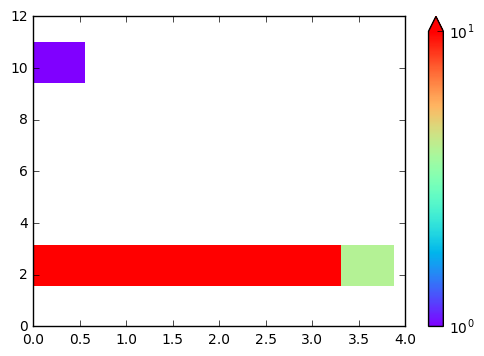

In [193]:
N = int(1e4)
a =np.random.randn(N)
b = np.random.randn(N)*0 + 2
b[1]=10
b[2]=11
nbin=7

H,xedges,yedges = np.histogram2d(a,b,nbin,range=[[0,np.max(a)],[0,np.max(b)]],normed=False);
X,Y = np.meshgrid(xedges, yedges);
fig = plt.figure()
ax1 = fig.add_subplot(111)
pcm=plt.pcolor(X,Y,H.transpose(),norm =LogNorm(vmin=1,vmax=10),cmap='rainbow');
plt.colorbar(pcm, ax=ax1, extend='max')

print(H)
print(X)
print(Y)

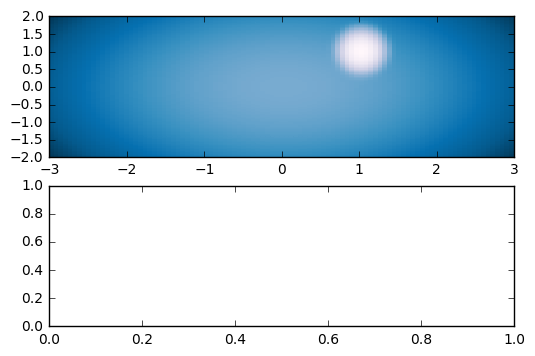

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.mlab import bivariate_normal

'''
Lognorm: Instead of pcolor log10(Z1) you can have colorbars that have
the exponential labels using a norm.
'''
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]

# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z1 = bivariate_normal(X, Y, 0.1, 0.2, 1.0, 1.0) +  \
    0.1 * bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

fig, ax = plt.subplots(2, 1)

pcm = ax[0].pcolor(X, Y, Z1,
                   norm=colors.LogNorm(vmin=Z1.min(), vmax=Z1.max()),
                   cmap='PuBu_r')
# fig.colorbar(pcm, ax=ax[0], extend='max')

